# Introduction

In recent years, the gaming industry has seen an explosive growth, with thousands of new titles being released across various platforms. Understanding the characteristics and genres of these games has become crucial for both players and developers. Genres help categorize games and provide insight into their gameplay style, mechanics, and target audience. However, with the sheer volume of games and the variability in user reviews, classifying games into specific genres can be a challenging task.

This project aims to leverage **Unsupervised Learning** techniques to automatically infer the genre of video games based on review comments and other game-related data. Using a dataset from the Steam platform, which includes features such as game titles, reviews, user scores, and playtime, we will explore how clustering algorithms can group similar games together. By focusing on text-based features like user reviews, we aim to build a model that can predict game genres without relying on explicit labels.

The goal of this project is to not only classify games into their respective genres but also to analyze the underlying data structure and provide insights into the patterns that emerge within the gaming industry.

In this report, I will cover the following steps:
1. Data collection and preprocessing.
2. Exploratory Data Analysis (EDA) to understand the data distribution and identify potential patterns.
3. Model building using various clustering techniques.
4. Evaluation of the model's performance based on game genres.
5. Conclusion and insights drawn from the results.


# Data Collection and Preprocessing

## Data Source and Provenance
The dataset used for this project is the [Steam Games Dataset](https://www.kaggle.com/datasets/fronkongames/steam-games-dataset). This dataset was created using code under the MIT license and data was collected through the Steam API and Steam Spy, a service providing detailed game statistics. The dataset includes over 100,000 games with various attributes such as game titles, release dates, developers, publishers, genres, user reviews, and playtime.

## Data Characteristics
Key columns in the dataset include:
- **AppID**: A unique identifier for each game.
- **Title**: The title of the game.
- **Release Date**: The game's release date.
- **Developer**: The game’s developer.
- **Publisher**: The publisher responsible for distributing the game.
- **Genres**: Genres assigned to each game (e.g., Action, RPG).
- **Reviews**: User-submitted reviews of the game.
- **Playtime**: The total playtime reported by users.

### Data Overview
Before proceeding with the analysis, I examined the dataset's structure. Below is a preview of the first few rows:


In [2]:
import pandas as pd

# Load the CSV data
csv_file_path = 'data/games.csv'
games_data = pd.read_csv(csv_file_path)

# Display the first few rows to ensure the data is loaded correctly
games_data.head()


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


The dataset consists of 39 columns, covering a wide range of information such as the game's description, supported languages, and user engagement metrics.

### Handling Missing Data
Upon inspecting the dataset, several columns were found to have missing values. Key columns with missing data include:

- **AppID**: 6 missing values.
- **Reviews**: 87,285 missing values.
- **Genres**: 4,841 missing values.
- **Developers**: 4,877 missing values.

To handle missing data, I implemented the following strategies:

- **AppID**: Since AppID is a critical unique identifier, rows with missing AppID values were removed.
- **Text-based columns**: Important columns such as "About the game", "Reviews", "Developers", "Publishers", and "Genres" were filled with empty strings ('') to preserve the remaining information.
- **Non-essential columns**: Columns with a high percentage of missing values that were not directly relevant to the analysis, such as "Website", "Support url", and "Metacritic url", were dropped to simplify the dataset.


In [3]:
# Fill missing text or categorical data with empty strings
games_data['About the game'] = games_data['About the game'].fillna('')
games_data['Reviews'] = games_data['Reviews'].fillna('')
games_data['Developers'] = games_data['Developers'].fillna('')
games_data['Publishers'] = games_data['Publishers'].fillna('')
games_data['Categories'] = games_data['Categories'].fillna('')
games_data['Genres'] = games_data['Genres'].fillna('')
games_data['Tags'] = games_data['Tags'].fillna('')

# Drop unnecessary columns with too many missing values
games_data = games_data.drop(columns=['Website', 'Support url', 'Support email', 'Metacritic url', 'Score rank', 'Notes', 'Screenshots', 'Movies'])

# Verify that missing data has been handled
missing_data = games_data.isnull().sum()
missing_data[missing_data > 0]

AppID    6
dtype: int64

This preprocessing step ensures that the dataset is clean and ready for further analysis while preserving essential information for the unsupervised learning tasks.

# Exploratory Data Analysis (EDA)

In this section, I will explore the Steam Games Dataset to understand the underlying structure of the data, identify patterns, and prepare for the next steps in model building.

## Basic Statistics for Numerical Columns
Here is a summary of the basic statistics for the numerical columns in the dataset:


In [5]:
# Display basic statistics for numerical columns
games_data.describe()

,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,9.741000e+04,97410.000000,97410.000000,97410.0,97410.000000,97410.000000,97410.000000,9.741000e+04,97410.000000,97410.000000,9.741000e+04,97410.000000,97410.000000,97410.000000,97410.000000
mean,1.627283e+02,0.282497,7.086262,0.0,0.493081,2.959193,0.034791,8.489366e+02,141.065989,18.562622,6.905128e+02,91.797937,9.621271,81.852459,10.340417
std,7.687116e+03,2.144294,12.387782,0.0,12.832834,14.545462,1.674105,2.287011e+04,4278.019743,160.413540,1.681717e+04,1068.494928,177.190210,1412.496536,192.711603
min,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000,0.990000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,0.000000,4.190000,0.0,0.000000,0.000000,0.000000,5.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.000000e+00,0.000000,9.990000,0.0,0.000000,0.000000,0.000000,3.500000e+01,10.000000,17.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,1.284268e+06,21.000000,999.980000,0.0,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000


The statistics reveal that many columns, such as **Price**, **User score**, and **Average playtime forever**, contain predominantly zero values, indicating that they are not suitable for analysis in their current form.

## Insights from Data Transformation
To address skewness in the data, I focused on non-zero values and applied log transformations. However, the results showed that very few non-zero values exist for many features, making them ineffective for meaningful analysis.

### Shift in Focus: Textual Features
Given the limitations of the numerical data, I shifted my focus to textual features such as:

- **Genres**: Categories such as Action, Adventure, Indie, etc.
- **Tags**: User-defined tags like Indie, Singleplayer, or Action.
- **Categories**: Gameplay modes such as Single-player, Multi-player, and Steam Achievements.

These textual features offer richer information, which can be explored through clustering or natural language processing (NLP) techniques to gain insights into how games are categorized or related.

## Exploring Genres, Tags, and Categories
To better understand the distribution of games across genres, tags, and categories, I first split these columns into lists of values for each game:


In [6]:
# Split 'Genres', 'Tags', and 'Categories' columns into lists
games_data['Genres_list'] = games_data['Genres'].fillna('').apply(lambda x: x.split(','))
games_data['Tags_list'] = games_data['Tags'].fillna('').apply(lambda x: x.split(','))
games_data['Categories_list'] = games_data['Categories'].fillna('').apply(lambda x: x.split(','))
# Preview the cleaned data
games_data[['Genres_list', 'Tags_list', 'Categories_list']].head()


,Genres_list,Tags_list,Categories_list
20200,"[Casual, Indie, Sports]","[Indie, Casual, Sports, Bowling]","[Single-player, Multi-player, Steam Achievemen..."
655370,"[Action, Indie]","[Indie, Action, Pixel Graphics, 2D, Retro, Arc...","[Single-player, Steam Achievements, Full contr..."
1732930,"[Action, Adventure, Indie, Strategy]",[],[Single-player]
1355720,"[Adventure, Casual, Indie]","[2D Platformer, Atmospheric, Surreal, Mystery,...","[Single-player, Full controller support]"
1139950,"[Adventure, Indie]","[Indie, Adventure, Nudity, Violent, Sexual Con...","[Single-player, Steam Achievements]"


### Genre Distribution
The most common genres in the dataset are shown in the bar chart below. The Indie genre dominates, followed by Casual, Action, and Adventure, reflecting the strong presence of indie games on the Steam platform.


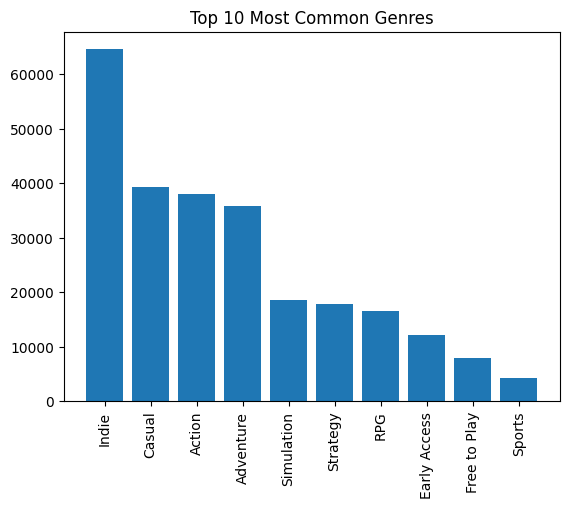

In [7]:
from collections import Counter
import matplotlib.pyplot as plt

# Count occurrences of each genre
genre_counter = Counter([genre for sublist in games_data['Genres_list'] for genre in sublist if genre])
common_genres = genre_counter.most_common(10)

# Plot the top 10 genres
genres, counts = zip(*common_genres)
plt.bar(genres, counts)
plt.title('Top 10 Most Common Genres')
plt.xticks(rotation=90)
plt.show()

### Tag Distribution
Tags provide a nuanced description of the games, reflecting gameplay mechanics or visual styles. The top 10 most common tags include Indie, Singleplayer, Action, and Adventure.


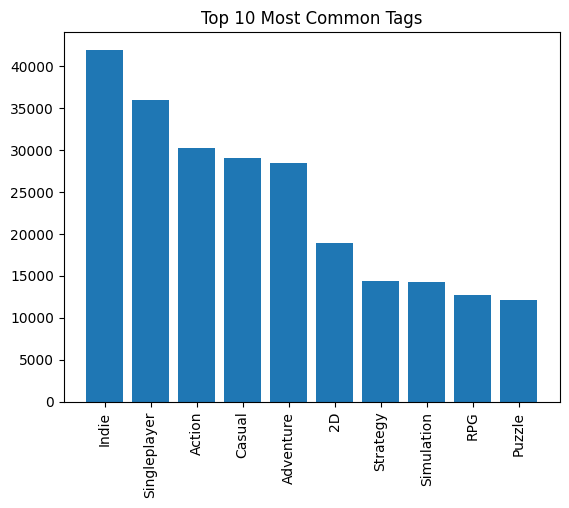

In [8]:
# Count occurrences of each tag
tag_counter = Counter([tag for sublist in games_data['Tags_list'] for tag in sublist if tag])
common_tags = tag_counter.most_common(10)

# Plot the top 10 tags
tags, counts = zip(*common_tags)
plt.bar(tags, counts)
plt.title('Top 10 Most Common Tags')
plt.xticks(rotation=90)
plt.show()

### Category Distribution
Categories describe gameplay modes and platform-specific features. The most common category is Single-player, aligning with the popularity of singleplayer games on Steam.


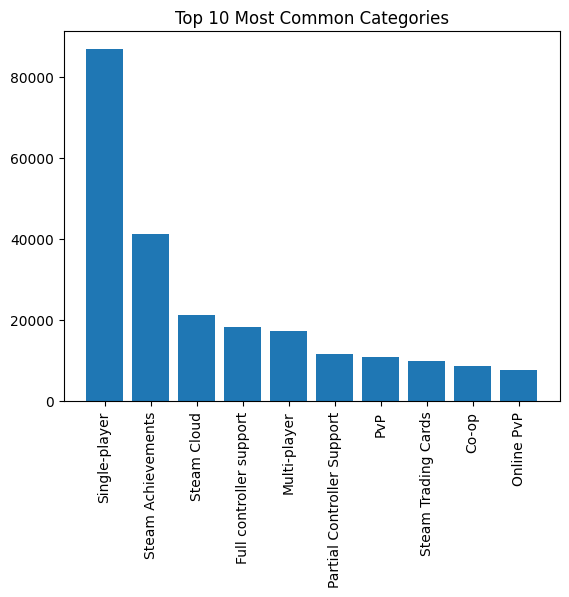

In [9]:
# Count occurrences of each category
category_counter = Counter([category for sublist in games_data['Categories_list'] for category in sublist if category])
common_categories = category_counter.most_common(10)

# Plot the top 10 categories
categories, counts = zip(*common_categories)
plt.bar(categories, counts)
plt.title('Top 10 Most Common Categories')
plt.xticks(rotation=90)
plt.show()

## Feature Vectorization
Next, I used **CountVectorizer** and **TfidfVectorizer** to transform the textual data into numerical form, which can be used for clustering.


In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

# Join lists into strings for Bag of Words approach
games_data['Genres_str'] = games_data['Genres_list'].apply(lambda x: ' '.join(x))
games_data['Tags_str'] = games_data['Tags_list'].apply(lambda x: ' '.join(x))

# Create Bag of Words vectors for Genres and Tags
vectorizer_genres = CountVectorizer()
genres_bow = vectorizer_genres.fit_transform(games_data['Genres_str'])

vectorizer_tags = CountVectorizer()
tags_bow = vectorizer_tags.fit_transform(games_data['Tags_str'])

# Convert to dense arrays
genres_bow_array = genres_bow.toarray()
tags_bow_array = tags_bow.toarray()

# Create TF-IDF vectors for Genres and Tags
tfidf_vectorizer_genres = TfidfVectorizer()
genres_tfidf = tfidf_vectorizer_genres.fit_transform(games_data['Genres_str'])

tfidf_vectorizer_tags = TfidfVectorizer()
tags_tfidf = tfidf_vectorizer_tags.fit_transform(games_data['Tags_str'])

# Convert to dense arrays
genres_tfidf_array = genres_tfidf.toarray()
tags_tfidf_array = tags_tfidf.toarray()

# Combine BoW/TF-IDF arrays for clustering
combined_features_bow = np.hstack([genres_bow_array, tags_bow_array])
combined_features_tfidf = np.hstack([genres_tfidf_array, tags_tfidf_array])

## K-Means Clustering
I applied K-Means clustering to the combined TF-IDF feature vectors and used the Elbow method to determine the optimal number of clusters.


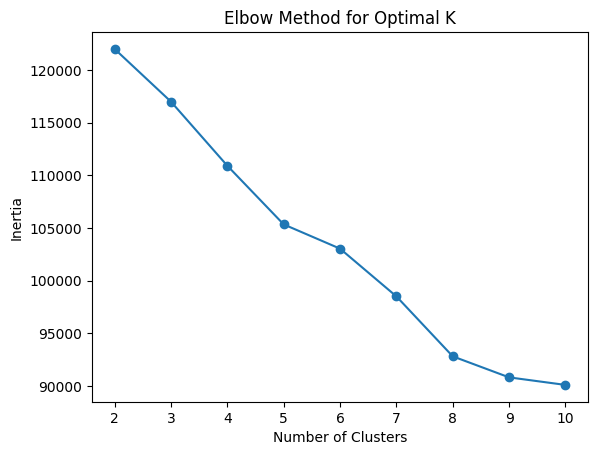

In [13]:
from sklearn.cluster import KMeans
import os

os.environ["LOKY_MAX_CPU_COUNT"] = "4"

# Determine the optimal number of clusters using the Elbow method
inertia = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(combined_features_tfidf)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Set the optimal number of clusters
optimal_clusters = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(combined_features_tfidf)

# Assign cluster labels to the data
games_data['Cluster'] = kmeans.labels_

## t-SNE Visualization of Clusters
Finally, I applied t-SNE to visualize the clustering results on a 2D plane for a subset of the data.


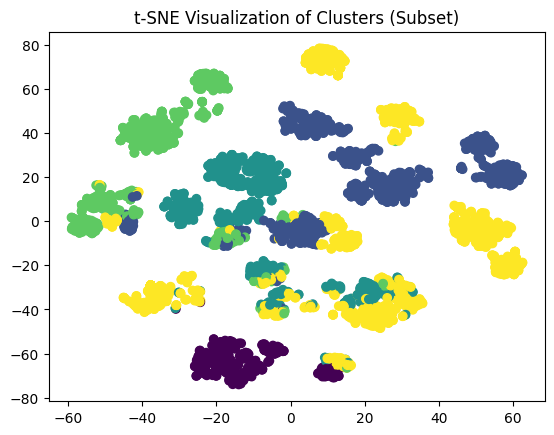

In [14]:
from sklearn.manifold import TSNE

# Randomly sample 5000 points for visualization
subset = np.random.choice(combined_features_tfidf.shape[0], size=5000, replace=False)
data_for_clustering_subset = combined_features_tfidf[subset]
games_data_subset = games_data.iloc[subset]

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_2d_subset = tsne.fit_transform(data_for_clustering_subset)

# Plot the clusters
plt.scatter(data_2d_subset[:, 0], data_2d_subset[:, 1], c=games_data_subset['Cluster'], cmap='viridis')
plt.title('t-SNE Visualization of Clusters (Subset)')
plt.show()

## Cluster Analysis
I analyzed the most common genres and tags within each cluster to better understand the structure of the data. The clusters revealed distinct groupings of games based on their genres and tags.

In [15]:
for cluster_num in range(optimal_clusters):
    print(f"Cluster {cluster_num} Analysis")

    # Filter games in the current cluster
    cluster_games = games_data[games_data['Cluster'] == cluster_num]

    # Count the genres in this cluster
    genre_counter = Counter([genre for sublist in cluster_games['Genres_list'] for genre in sublist if genre])
    common_genres = genre_counter.most_common(5)

    # Count the tags in this cluster
    tag_counter = Counter([tag for sublist in cluster_games['Tags_list'] for tag in sublist if tag])
    common_tags = tag_counter.most_common(5)

    print("Top 5 Genres:", common_genres)
    print("Top 5 Tags:", common_tags)
    print("-" * 40)

Cluster 0 Analysis
Top 5 Genres: [('Free to Play', 7910), ('Indie', 5277), ('Casual', 3666), ('Action', 3441), ('Adventure', 2895)]
Top 5 Tags: [('Free to Play', 3227), ('Indie', 2218), ('Action', 1638), ('Casual', 1602), ('Singleplayer', 1303)]
----------------------------------------
Cluster 1 Analysis
Top 5 Genres: [('Adventure', 22740), ('Indie', 16782), ('Action', 10097), ('Casual', 7513), ('RPG', 5048)]
Top 5 Tags: [('Adventure', 17192), ('Indie', 11426), ('Singleplayer', 10318), ('Action', 8352), ('Casual', 6363)]
----------------------------------------
Cluster 2 Analysis
Top 5 Genres: [('Simulation', 16526), ('Indie', 11461), ('Casual', 8272), ('Adventure', 5443), ('Strategy', 5144)]
Top 5 Tags: [('Simulation', 11718), ('Indie', 7095), ('Singleplayer', 6754), ('Casual', 6041), ('Strategy', 4264)]
----------------------------------------
Cluster 3 Analysis
Top 5 Genres: [('Casual', 13289), ('Indie', 10715), ('Strategy', 6720), ('RPG', 1549), ('Adventure', 924)]
Top 5 Tags: [('C